In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 752.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="uhrpY7vYVAtQ6Of79idJ")
project = rf.workspace("mrkbil-projects").project("fabric-defect-dataset")
version = project.version(1)
dataset = version.download("multiclass")


train_path='/content/Fabric-Defect-Dataset-1/train'
valid_path='/content/Fabric-Defect-Dataset-1/valid'
test_path='/content/Fabric-Defect-Dataset-1/test'
classes='/_classes.csv'

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fabric-Defect-Dataset-1 in multiclass:: 100%|██████████| 2476/2476 [00:02<00:00, 1197.89it/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DIP

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1c69eUIfPfi6r3aS038Of4RbJLYg2M7W7/DIP


In [5]:
train_df=pd.read_csv(train_path+classes)
test_df=pd.read_csv(test_path+classes)
valid_df=pd.read_csv(valid_path+classes)

In [6]:
train_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
test_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
valid_df.columns=['filename', 'Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']
train_df.head(2)

,filename,Broken_button,Button_hike,Color_defect,Foreign_yarn,Hole,Swing_error
0,IMG-20240501-WA0033_jpg.rf.3d08e7e198362f2a247...,1,0,0,0,0,0
1,hole_png.rf.3b35998f2ead7b5b73772689853b82b9.jpg,0,0,0,0,1,0


In [7]:
from tqdm import tqdm
import cv2
import os
target_size=(640, 640)

def load_images_and_labels(df, directory):
    dataset = []
    total_samples = len(df)
    i=0
    for index, row in tqdm(df.iterrows(), total=total_samples, desc="Loading Images"):
        # if(i==10):['Broken-Button', 'Button', 'Color', 'Hole', 'Swing', 'yarn']
        #   break
        i+=1
        filename = row['filename']
        filepath = os.path.join(directory, filename)

        img = cv2.imread(filepath)
        img = cv2.resize(img, target_size)

        label = row[['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']].values.tolist()

        dataset.append((img, label))
    return dataset

def get_x_y_from_dataset(dataset):
    X = np.array([data_point[0] for data_point in dataset])
    y = np.array([data_point[1] for data_point in dataset])
    return X, y

In [8]:
train_data=load_images_and_labels(train_df,train_path)
test_data=load_images_and_labels(test_df,test_path)
valid_data=load_images_and_labels(valid_df,valid_path)

Loading Images: 100%|██████████| 202/202 [00:01<00:00, 138.11it/s]


In [9]:
X_train, y_train = get_x_y_from_dataset(train_data)
X_test, y_test = get_x_y_from_dataset(test_data)
X_valid, y_valid = get_x_y_from_dataset(valid_data)

train_data=None
test_data=None
valid_data=None

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (2163, 640, 640, 3)
Shape of y_train: (2163, 6)
Shape of X_test: (103, 640, 640, 3)
Shape of y_test: (103, 6)
Shape of X_valid: (202, 640, 640, 3)
Shape of y_valid: (202, 6)


In [10]:
from sklearn.model_selection import train_test_split

merged_X = np.concatenate([X_train, X_test, X_valid], axis=0)
merged_y = np.concatenate([y_train, y_test, y_valid], axis=0)
print("Shape of merged_X:", merged_X.shape)
print("Shape of merged_y:", merged_y.shape)

Shape of merged_X: (2468, 640, 640, 3)
Shape of merged_y: (2468, 6)


In [11]:
from sklearn.model_selection import train_test_split
# X_train, X_test_val, y_train, y_test_val = train_test_split(augmented_images, augmented_labels, test_size=0.3, random_state=42)
X_train, X_test_val, y_train, y_test_val = train_test_split(merged_X, merged_y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
merged_X=None
merged_y=None
X_train=None
X_val=None
y_train=None
y_val=None
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)

X_test shape: (370, 640, 640, 3)
y_test shape: (370, 6)


Sample images from testing set:


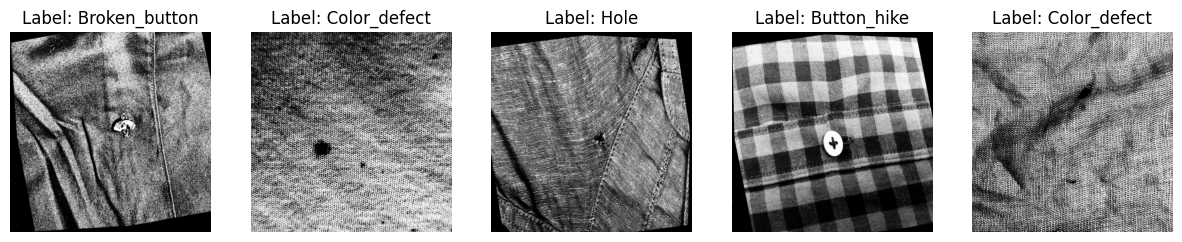

In [12]:
def show_samples(images, labels, label_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        axes[i].imshow(images[i])
        label_index = labels[i].argmax()
        label_name = label_names[label_index]
        axes[i].set_title("Label: {}".format(label_name))
        axes[i].axis('off')

    plt.show()

label_names = ['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']

# print("Sample images from training set:")
# show_samples(X_train, y_train, label_names)
print("Sample images from testing set:")
show_samples(X_test, y_test, label_names)
# print("Sample images from Validation set:")
# show_samples(X_val, y_val, label_names)

In [13]:
VGG16 = tf.keras.models.load_model('BestModels/vgg16_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
ResNet50 = tf.keras.models.load_model('BestModels/resnet50_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
MobileNet = tf.keras.models.load_model('BestModels/MobileNet_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
InceptionV3 = tf.keras.models.load_model('BestModels/inception_v3_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')
Xception = tf.keras.models.load_model('BestModels/xception_weights_tf_dim_ordering_tf_kernels_notop_best_model.h5')

In [14]:
loss,accuracy = VGG16.evaluate(X_test,y_test)
print('VGG16')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = ResNet50.evaluate(X_test,y_test)
print('ResNet50')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = MobileNet.evaluate(X_test,y_test)
print('MobileNet')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = InceptionV3.evaluate(X_test,y_test)
print('InceptionV3')
print("loss:",loss)
print("Accuracy:",accuracy)
loss,accuracy = Xception.evaluate(X_test,y_test)
print('Xception')
print("loss:",loss)
print("Accuracy:",accuracy)

12/12 [==============================] - 74s 3s/step - loss: 1.3444 - accuracy: 0.7973
VGG16
loss: 1.3443894386291504
Accuracy: 0.7972972989082336
12/12 [==============================] - 28s 1s/step - loss: 1.0353 - accuracy: 0.8595
ResNet50
loss: 1.0352932214736938
Accuracy: 0.8594594597816467
12/12 [==============================] - 11s 506ms/step - loss: 10.6414 - accuracy: 0.7730
MobileNet
loss: 10.641448020935059
Accuracy: 0.7729730010032654
12/12 [==============================] - 35s 2s/step - loss: 1.9029 - accuracy: 0.5595
InceptionV3
loss: 1.902896523475647
Accuracy: 0.5594594478607178
12/12 [==============================] - 42s 2s/step - loss: 1.6498 - accuracy: 0.6541
Xception
loss: 1.649785041809082
Accuracy: 0.6540540456771851


In [15]:
y_pred1 = VGG16.predict(X_test)
y_pred2 = ResNet50.predict(X_test)
y_pred3 = MobileNet.predict(X_test)
y_pred4 = InceptionV3.predict(X_test)
y_pred5 = Xception.predict(X_test)

12/12 [==============================] - 14s 1s/step


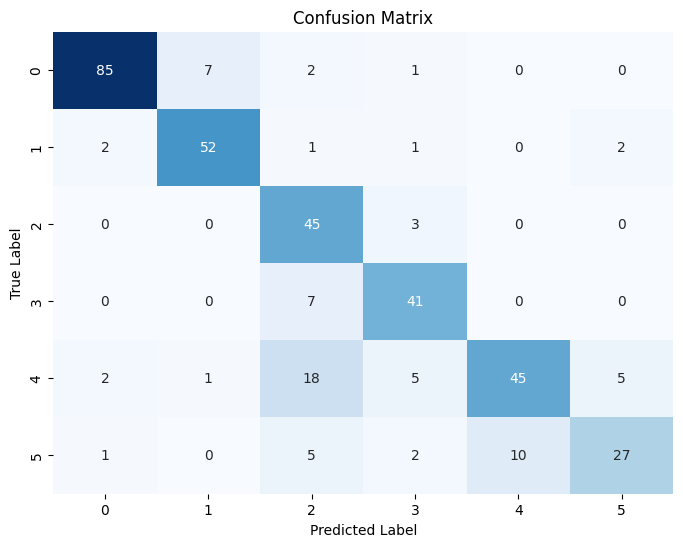

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred1, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

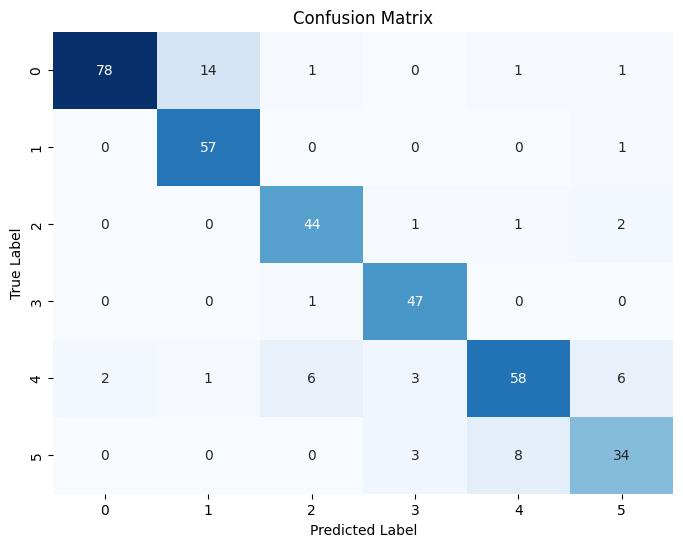

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred2, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

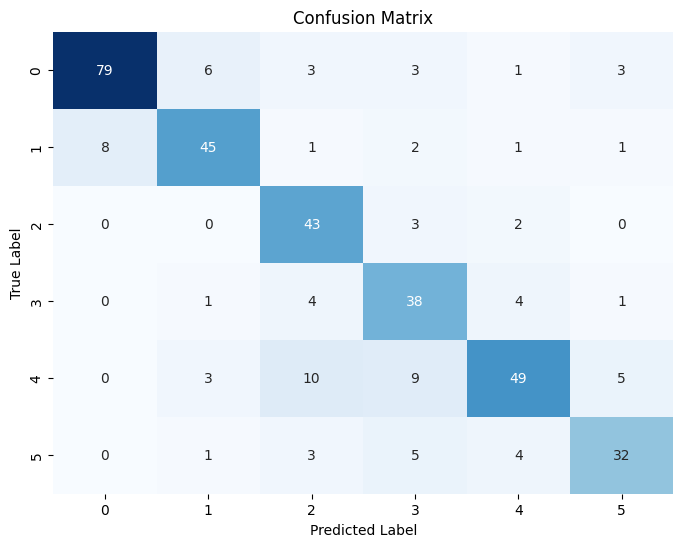

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred3, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

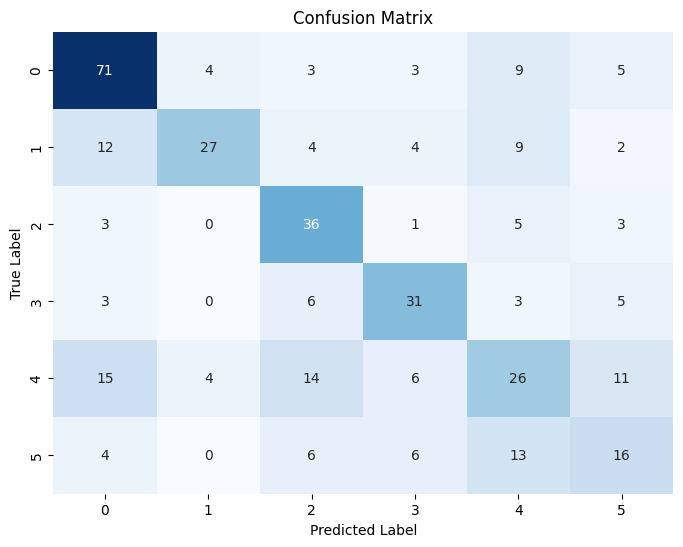

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred4, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

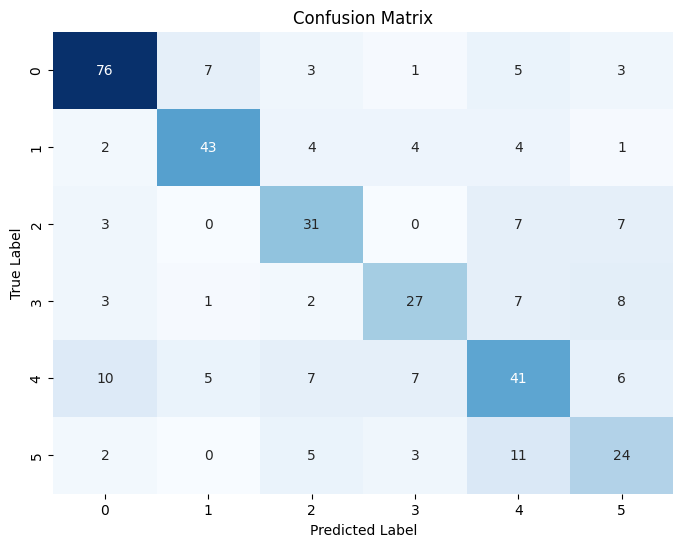

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred5, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
import matplotlib.pyplot as plt

def show_sample_images(images, labels, predicted_labels, label_names, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        axes[i].imshow(images[i])
        true_label = label_names[labels[i]]
        predicted_label = label_names[predicted_labels[i]]
        axes[i].set_title("True Label: {}\nPredicted Label: {}".format(true_label, predicted_label))
        axes[i].axis('off')

    plt.show()

label_names=['Broken_button','Button_hike','Color_defect','Foreign_yarn','Hole','Swing_error']

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        95
           1       0.87      0.90      0.88        58
           2       0.58      0.94      0.71        48
           3       0.77      0.85      0.81        48
           4       0.82      0.59      0.69        76
           5       0.79      0.60      0.68        45

    accuracy                           0.80       370
   macro avg       0.80      0.80      0.78       370
weighted avg       0.82      0.80      0.80       370

Sample images with predicted labels:


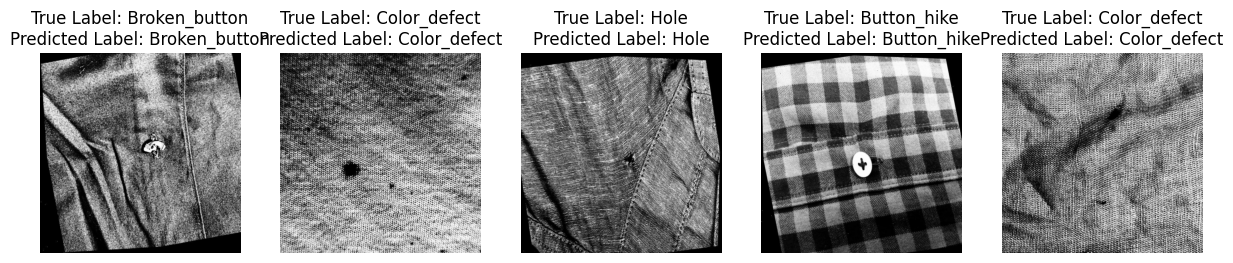

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        95
           1       0.79      0.98      0.88        58
           2       0.85      0.92      0.88        48
           3       0.87      0.98      0.92        48
           4       0.85      0.76      0.81        76
           5       0.77      0.76      0.76        45

    accuracy                           0.86       370
   macro avg       0.85      0.87      0.86       370
weighted avg       0.87      0.86      0.86       370

Sample images with predicted labels:


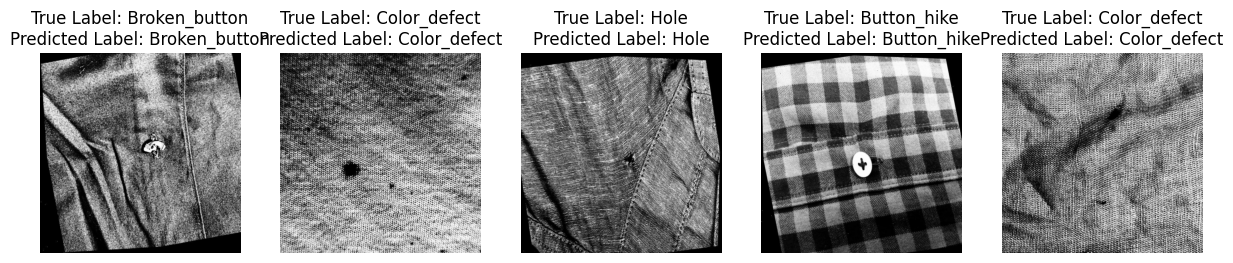

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        95
           1       0.80      0.78      0.79        58
           2       0.67      0.90      0.77        48
           3       0.63      0.79      0.70        48
           4       0.80      0.64      0.72        76
           5       0.76      0.71      0.74        45

    accuracy                           0.77       370
   macro avg       0.76      0.78      0.76       370
weighted avg       0.79      0.77      0.77       370

Sample images with predicted labels:


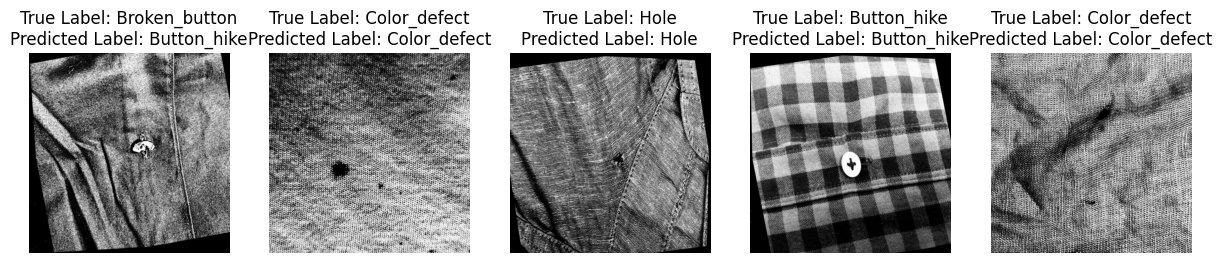

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        95
           1       0.77      0.47      0.58        58
           2       0.52      0.75      0.62        48
           3       0.61      0.65      0.63        48
           4       0.40      0.34      0.37        76
           5       0.38      0.36      0.37        45

    accuracy                           0.56       370
   macro avg       0.56      0.55      0.54       370
weighted avg       0.56      0.56      0.55       370

Sample images with predicted labels:


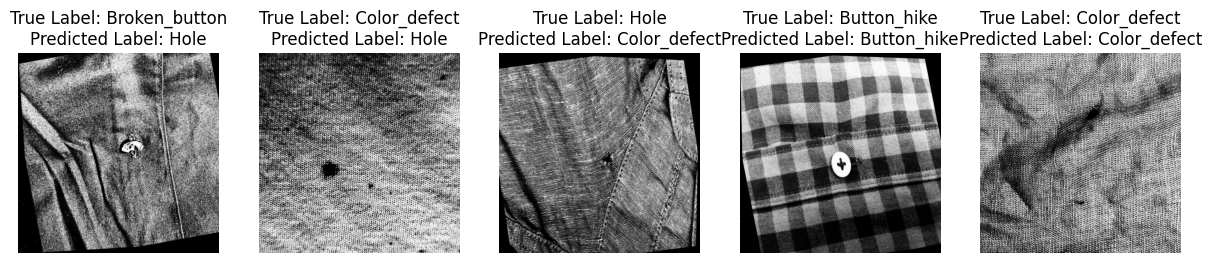

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        95
           1       0.77      0.74      0.75        58
           2       0.60      0.65      0.62        48
           3       0.64      0.56      0.60        48
           4       0.55      0.54      0.54        76
           5       0.49      0.53      0.51        45

    accuracy                           0.65       370
   macro avg       0.64      0.64      0.64       370
weighted avg       0.66      0.65      0.65       370

Sample images with predicted labels:


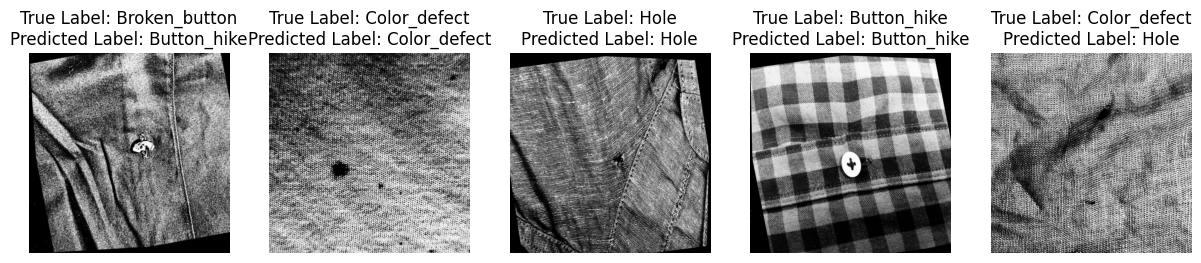

In [23]:
from sklearn.metrics import classification_report

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred1, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred2, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
from sklearn.metrics import classification_report
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)



y_pred_labels = np.argmax(y_pred3, axis=1)


report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred4, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

y_pred_labels = np.argmax(y_pred5, axis=1)

report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))
print("Sample images with predicted labels:")
show_sample_images(X_test, y_test_labels, y_pred_labels, label_names)

In [25]:
from sklearn.metrics import accuracy_score

predictions_VGG16 = VGG16.predict(X_test)
predictions_ResNet50 = ResNet50.predict(X_test)
predictions_MobileNet = MobileNet.predict(X_test)
predictions_InceptionV3 = InceptionV3.predict(X_test)
predictions_Xception = Xception.predict(X_test)

# Convert probabilities to class labels
predicted_classes_VGG16 = np.argmax(predictions_VGG16, axis=-1)
predicted_classes_ResNet50 = np.argmax(predictions_ResNet50, axis=-1)
predicted_classes_MobileNet = np.argmax(predictions_MobileNet, axis=-1)
predicted_classes_InceptionV3 = np.argmax(predictions_InceptionV3, axis=-1)
predicted_classes_Xception = np.argmax(predictions_Xception, axis=-1)




12/12 [==============================] - 13s 1s/step


In [26]:
# Convert one-hot encoded y_test back to integer labels
true_classes = np.argmax(y_test, axis=-1)

# Compute individual accuracies
accuracy_VGG16 = accuracy_score(true_classes, predicted_classes_VGG16)
accuracy_ResNet50 = accuracy_score(true_classes, predicted_classes_ResNet50)
accuracy_MobileNet = accuracy_score(true_classes, predicted_classes_MobileNet)
accuracy_InceptionV3 = accuracy_score(true_classes, predicted_classes_InceptionV3)
accuracy_Xception = accuracy_score(true_classes, predicted_classes_Xception)

# Ensemble predictions using majority voting
ensemble_predictions = predictions_VGG16 + predictions_ResNet50 +predictions_MobileNet+ predictions_InceptionV3 + predictions_Xception
final_predictions = np.argmax(ensemble_predictions, axis=-1)

# Compute ensemble accuracy
ensemble_accuracy = accuracy_score(true_classes, final_predictions)

In [27]:
print("Individual Accuracies:")
print("VGG16 Accuracy:", accuracy_VGG16)
print("ResNet50 Accuracy:", accuracy_ResNet50)
print("ResNet50 Accuracy:", accuracy_MobileNet)
print("InceptionV3 Accuracy:", accuracy_InceptionV3)
print("Xception Accuracy:", accuracy_Xception)

print("Ensemble Accuracy (Majority Voting):", ensemble_accuracy)

Individual Accuracies:
VGG16 Accuracy: 0.7972972972972973
ResNet50 Accuracy: 0.8594594594594595
ResNet50 Accuracy: 0.772972972972973
InceptionV3 Accuracy: 0.5594594594594594
Xception Accuracy: 0.654054054054054
Ensemble Accuracy (Majority Voting): 0.8918918918918919


In [28]:
from sklearn.metrics import accuracy_score
import numpy as np

# Define the accuracies of each model on the validation set
accuracies = {
    "VGG16": accuracy_VGG16,
    "ResNet50": accuracy_ResNet50,
    "MobileNet": accuracy_MobileNet,
    "InceptionV3": accuracy_InceptionV3,
    "Xception": accuracy_Xception
}

# Normalize accuracies to sum up to 1
total_accuracy = sum(accuracies.values())
weights = {model: accuracy / total_accuracy for model, accuracy in accuracies.items()}

# Initialize ensemble predictions
ensemble_predictions = np.zeros_like(predictions_VGG16)

# Combine predictions using weighted voting
for model, weight in weights.items():
    # Calculate the weighted prediction for each model
    weighted_predictions = weight * locals()[f"predictions_{model}"]
    # Accumulate the weighted predictions
    ensemble_predictions += weighted_predictions

# Convert ensemble predictions to class labels
final_predictions = np.argmax(ensemble_predictions, axis=-1)

# Compute ensemble accuracy
ensemble_accuracy = accuracy_score(true_classes, final_predictions)


In [29]:
print(ensemble_accuracy)

0.9


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding metrics
models = ['VGG16', 'ResNet50', 'InceptionV3', 'InceptionResNetV2', 'Xception']
macro_avg_precision = [0.87, 0.70, 0.53, 0.07, 0.57]
macro_avg_recall = [0.73, 0.73, 0.47, 0.17, 0.58]
macro_avg_f1_score = [0.74, 0.70, 0.46, 0.10, 0.57]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting macro average precision
rects1 = ax.bar(x - width, macro_avg_precision, width, label='Precision', color='skyblue')
# Plotting macro average recall
rects2 = ax.bar(x, macro_avg_recall, width, label='Recall', color='lightgreen')
# Plotting macro average F1-score
rects3 = ax.bar(x + width, macro_avg_f1_score, width, label='F1-score', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Macro Average Precision, Recall, and F1-score for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['YOLOv8M', 'YOLOv8 OBB']
precision = [0.95, 0.819]
recall = [0.564, 0.686]
mAP50 = [0.621, 0.664]
mAP50_95 = [0.394, 0.521]

# Plotting
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(6, 6))

# Precision
plt.subplot(2, 2, 1)
plt.bar(x, precision, width=0.3, color=['skyblue', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(x, models)

# Recall
plt.subplot(2, 2, 2)
plt.bar(x, recall, width=0.3, color=['skyblue', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(x, models)

# mAP50
plt.subplot(2, 2, 3)
plt.bar(x, mAP50, width=0.3, color=['skyblue', 'salmon'])
plt.xlabel('Models')
plt.ylabel('mAP50')
plt.title('mAP50 Comparison')
plt.xticks(x, models)

# mAP50-95
plt.subplot(2, 2, 4)
plt.bar(x, mAP50_95, width=0.3, color=['skyblue', 'salmon'])
plt.xlabel('Models')
plt.ylabel('mAP50-95')
plt.title('mAP50-95 Comparison')
plt.xticks(x, models)

plt.tight_layout()
plt.show()


In [ ]:
ensemble_predictions = (predictions_model1 + predictions_model2 + predictions_model3) / 3

# Take the class with the highest probability as the final prediction
final_predictions = np.argmax(ensemble_predictions, axis=1)

# Assuming you have ground truth labels stored in 'true_labels'
# Calculate accuracy
true_labels = np.random.randint(0, 5, size=100)  # Example ground truth labels
accuracy = np.mean(final_predictions == true_labels)
print("Ensemble accuracy:", accuracy)